In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
df = pd.read_csv("data.csv")

In [23]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [24]:
null_values = df.isnull().sum()
print("Columns with Null Values:")
print(null_values[null_values > 0])

Columns with Null Values:
Unnamed: 32    569
dtype: int64


In [25]:
# Dropping unnecessary columns ('id' and 'Unnamed: 32')
df_cleaned = df.drop(columns=['id', 'Unnamed: 32'])

In [26]:
# Separating features (x) and target variable (y)
x = df_cleaned.drop(columns=['diagnosis'])
print("\nFeatures (x):")
print(x.head())


Features (x):
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst 

In [27]:
y = df['diagnosis'].values
print("\nTarget variable (y) for the first 100 rows:")
y[0:100]



Target variable (y) for the first 100 rows:


array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M'], dtype=object)

In [28]:
# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=11, stratify=y)

In [29]:
# Creating and fitting a Gaussian Naive Bayes classifier
NB = GaussianNB()
NB.fit(x_train, y_train)

GaussianNB()

In [30]:
NB.score(x_test, y_test)

0.9385964912280702

In [31]:
# Making predictions on the testing set
prediction = NB.predict(x_test)

In [32]:
# Displaying predicted values and actual values side by side
print("\nPredicted values and actual values:")
for pred, actual in zip(prediction, y_test):
    print(f"Predicted: {pred}, Actual: {actual}")



Predicted values and actual values:
Predicted: M, Actual: M
Predicted: M, Actual: M
Predicted: B, Actual: B
Predicted: B, Actual: B
Predicted: B, Actual: B
Predicted: B, Actual: B
Predicted: M, Actual: M
Predicted: B, Actual: B
Predicted: B, Actual: B
Predicted: M, Actual: M
Predicted: B, Actual: B
Predicted: B, Actual: B
Predicted: B, Actual: B
Predicted: B, Actual: B
Predicted: B, Actual: B
Predicted: B, Actual: B
Predicted: B, Actual: B
Predicted: B, Actual: B
Predicted: B, Actual: B
Predicted: M, Actual: M
Predicted: B, Actual: B
Predicted: B, Actual: B
Predicted: B, Actual: B
Predicted: B, Actual: B
Predicted: B, Actual: B
Predicted: B, Actual: B
Predicted: M, Actual: M
Predicted: B, Actual: B
Predicted: B, Actual: B
Predicted: B, Actual: B
Predicted: M, Actual: M
Predicted: B, Actual: B
Predicted: B, Actual: B
Predicted: B, Actual: B
Predicted: M, Actual: M
Predicted: M, Actual: M
Predicted: M, Actual: M
Predicted: M, Actual: M
Predicted: M, Actual: M
Predicted: B, Actual: B
Pre

In [34]:
precision = precision_score(y_test, prediction, pos_label='M')

# Recall
recall = recall_score(y_test, prediction, pos_label='M')

# F1 Score
f1 = f1_score(y_test, prediction, pos_label='M')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, prediction)

# Sensitivity (True Positive Rate)
sensitivity = recall

# Specificity (True Negative Rate)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Accuracy: 0.9385964912280702
Precision: 0.9487179487179487
Recall: 0.8809523809523809
F1 Score: 0.9135802469135802
Sensitivity: 0.8809523809523809
Specificity: 0.9722222222222222


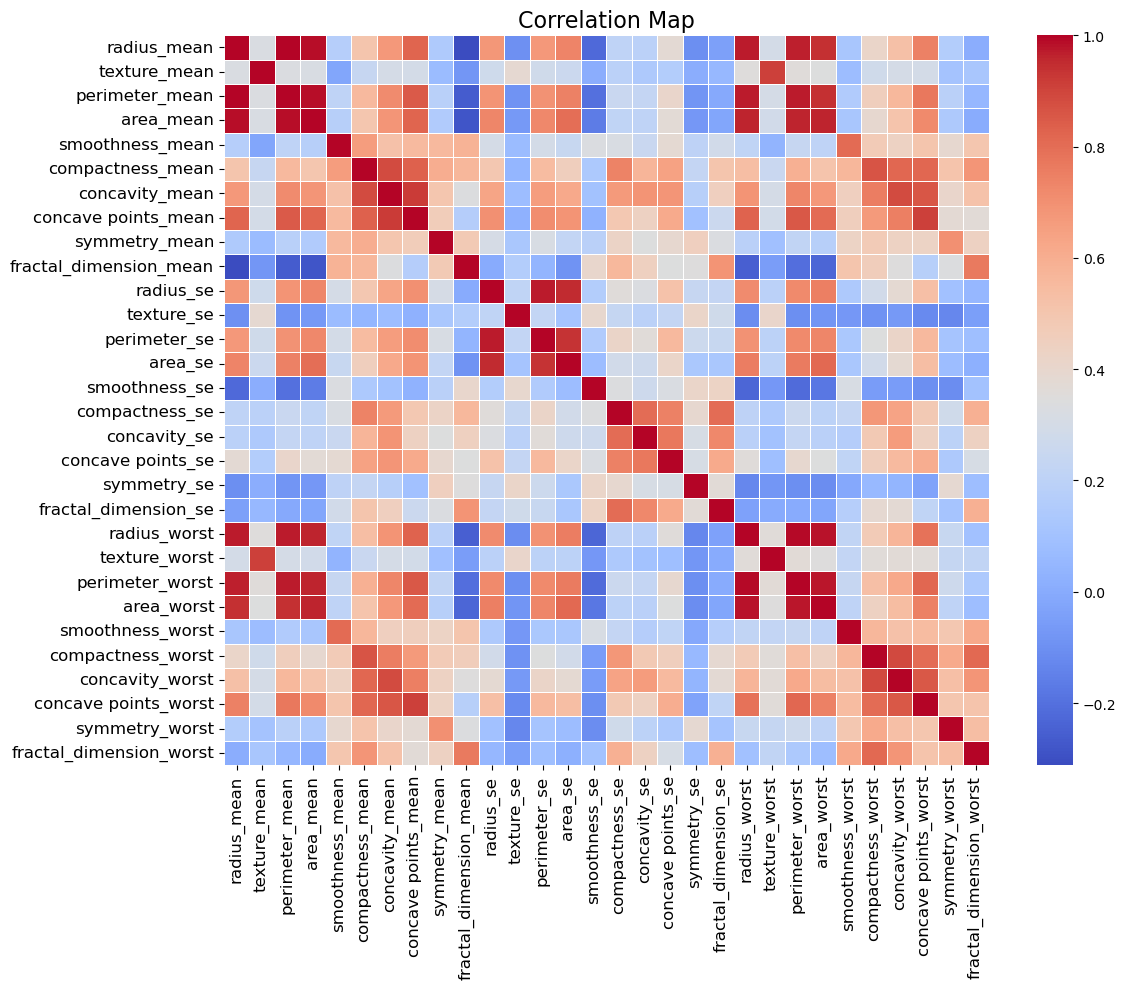

In [35]:
from sklearn.preprocessing import LabelEncoder

correlation_matrix = df_cleaned.drop(columns=['diagnosis']).corr()

# Plotting the correlation heatmap with enhanced appearance
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Map', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)  # Rotate y-axis ticks for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [36]:
print("\nResults Summary:")
print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1 Score: {f1:.2%}")
print(f"Sensitivity: {sensitivity:.2%}")
print(f"Specificity: {specificity:.2%}")

print("\nInterpretation:")
print("The high accuracy suggests that the classifier performed well overall.")
print("Precision, Recall, and F1 Score are also high, indicating that the model is proficient")
print("at correctly identifying malignant cases and capturing a high proportion of actual malignant cases.")
print("A high specificity value indicates that the model is effective at correctly identifying benign cases.")
print("These results are promising, especially in medical contexts where accurate diagnosis is crucial.")
print("However, it's important to consider the specific application and the consequences of different types of errors.")



Results Summary:
Accuracy: 93.86%
Precision: 94.87%
Recall: 88.10%
F1 Score: 91.36%
Sensitivity: 88.10%
Specificity: 97.22%

Interpretation:
The high accuracy suggests that the classifier performed well overall.
Precision, Recall, and F1 Score are also high, indicating that the model is proficient
at correctly identifying malignant cases and capturing a high proportion of actual malignant cases.
A high specificity value indicates that the model is effective at correctly identifying benign cases.
These results are promising, especially in medical contexts where accurate diagnosis is crucial.
However, it's important to consider the specific application and the consequences of different types of errors.
